# Phase 3: The LRCP Approach - Building Models the Right Way

## Objective: Implement rigorous data science methodology to build the best possible model while avoiding data leakage.

Key Principles to Follow:

Never use test data for any decisions (no peeking!)
Cross-validation handles model selection without separate validation set
Always compare against simple baselines
Document all decisions with business and statistical reasoning
Be conservative in claims and deployment recommendations

In [ ]:
# Get data from Google Drive
!gdown 1V7EiaJmwXvqdkVX_RSHMtgyPayTztp3a
!gdown 1Yc52N7WmdAqrFlh0d-aL2Gnex3G7KVUH

Downloading...
From: https://drive.google.com/uc?id=1V7EiaJmwXvqdkVX_RSHMtgyPayTztp3a
To: /content/202508_airbnb_listings_nyc.csv
100% 5.74M/5.74M [00:00<00:00, 43.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Yc52N7WmdAqrFlh0d-aL2Gnex3G7KVUH
To: /content/202508_airbnb_listings_jc.csv
100% 346k/346k [00:00<00:00, 89.9MB/s]


In [ ]:
import pandas as pd
nyc_df = pd.read_csv('202508_airbnb_listings_nyc.csv')
jc_df = pd.read_csv('202508_airbnb_listings_jc.csv')

**Step 1: Comprehensive Exploratory Data Analysis**
- Generate descriptive statistics for all variables
- Visualize distributions of features and target variable
- Check for missing values and develop imputation strategy
- Identify and document data quality issues
- Create correlation matrix to understand feature relationships
- Generate business insights from the data


In [ ]:
nyc_df.shape

(36403, 18)

In [ ]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36403 entries, 0 to 36402
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36403 non-null  int64  
 1   name                            36401 non-null  object 
 2   host_id                         36403 non-null  int64  
 3   host_name                       36390 non-null  object 
 4   neighbourhood_group             36403 non-null  object 
 5   neighbourhood                   36403 non-null  object 
 6   latitude                        36403 non-null  float64
 7   longitude                       36403 non-null  float64
 8   room_type                       36403 non-null  object 
 9   price                           21279 non-null  float64
 10  minimum_nights                  36403 non-null  int64  
 11  number_of_reviews               36403 non-null  int64  
 12  last_review                     

In [ ]:
y_nyc = nyc_df.availability_365
X_nyc = nyc_df.select_dtypes('number').drop(columns=['availability_365'])

In [ ]:
print("="*80)
print("Step 1: Comprehensive Exploratory Data Analysis for New York city")
print("="*80)

# Target Analysis
print("Target Variable Analysis")
print(f"\nMissing Target Variable Count: {y_nyc.isnull().sum()}")
print(f"Targt variable Statistics \n{y_nyc.describe()}")
print("="*80)

# Features Analysis
print("Feature Set Analysis")
print(f"\nTotal features: {len(X_nyc.columns)}")
print(f"Features with missing values: {X_nyc.isnull().any().sum()}")
print(f"\nMissing Feature Values \n{X_nyc.isnull().sum()[X_nyc.isnull().sum() > 0]}")
print(f"\nMissing Feature values percentage \n{X_nyc.isnull().mean()[X_nyc.isnull().mean() > 0] * 100}")
print("="*80)

# If there is any missing target variable then remove the row
y_nyc_clean = y_nyc.dropna()
X_nyc_clean = X_nyc.loc[y_nyc_clean.index]

# To handle null values in features set, insert mean values
X_nyc_clean = X_nyc_clean.fillna(X_nyc_clean.mean())

# Printing features after cleaning
print("Feature Set After Cleaning")
print(f"\nAfter cleaning: {len(y_nyc_clean)} properties, {X_nyc_clean.shape[1]} features")
print("="*80)

# Feature set statistics and correlation with target variable
print("Feature Set Statistics")
print(f"\nFeatures Statistics \n{X_nyc_clean.describe()}")
print("="*80)
print("Correlation Matrix")
print(f"\n{X_nyc_clean.corrwith(y_nyc_clean).sort_values(ascending= False)}")
print("="*80)


Step 1: Comprehensive Exploratory Data Analysis for New York city
Target Variable Analysis

Missing Target Variable Count: 0
Targt variable Statistics 
count    36403.000000
mean       161.655166
std        147.346919
min          0.000000
25%          0.000000
50%        153.000000
75%        318.000000
max        365.000000
Name: availability_365, dtype: float64
Feature Set Analysis

Total features: 10
Features with missing values: 2

Missing Feature Values 
price                15124
reviews_per_month    11310
dtype: int64

Missing Feature values percentage 
price                41.546026
reviews_per_month    31.068868
dtype: float64
Feature Set After Cleaning

After cleaning: 36403 properties, 10 features
Feature Set Statistics

Features Statistics 
                 id       host_id      latitude     longitude         price  \
count  3.640300e+04  3.640300e+04  36403.000000  36403.000000  36403.000000   
mean   4.525526e+17  1.737617e+08     40.728443    -73.947333    447.871611   

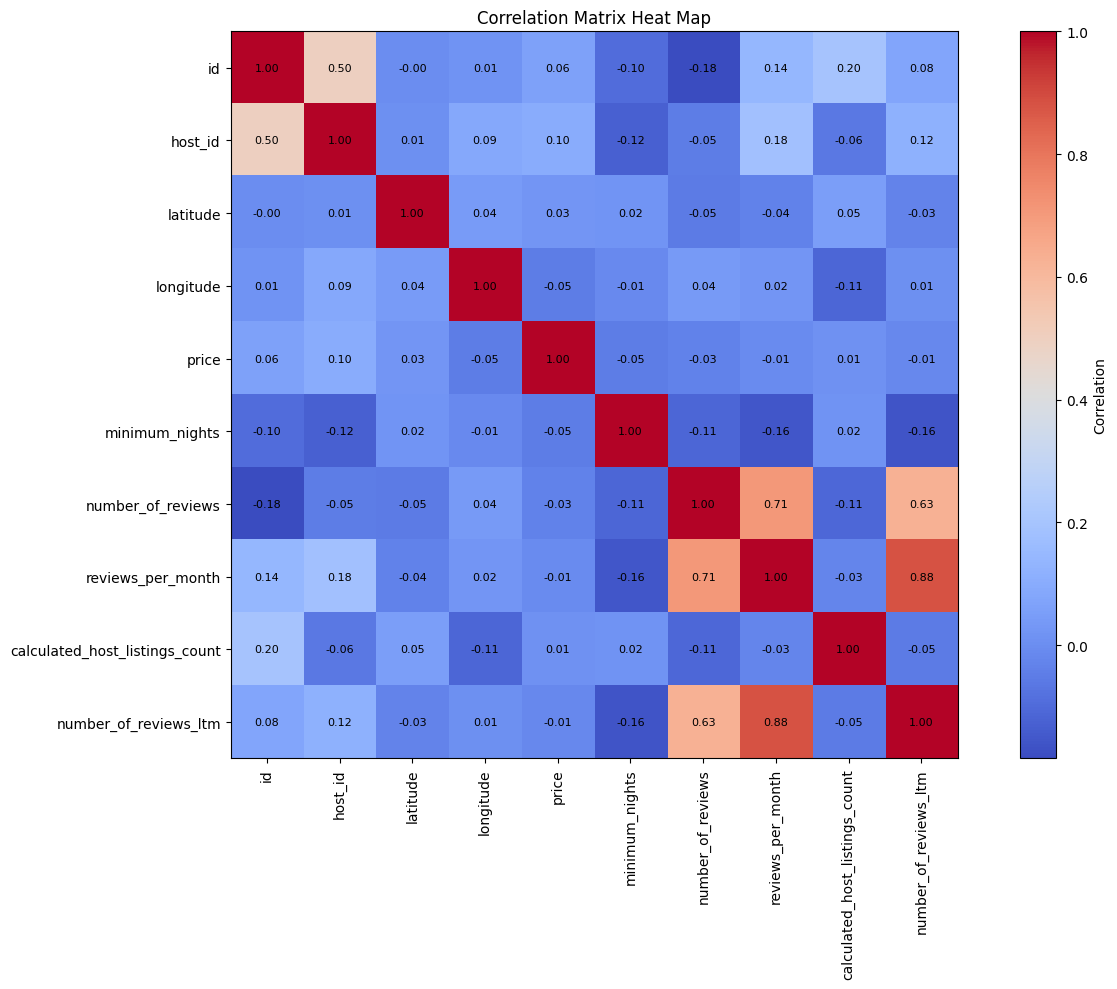

In [ ]:
import numpy as np
corr_nyc = X_nyc_clean.corr()
plt.figure(figsize=(14,10))
plt.imshow(corr_nyc, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation')
for i in range(len(corr_nyc.columns)):
    for j in range(len(corr_nyc.columns)):
        plt.text(j, i, f"{corr_nyc.iloc[i, j]:.2f}",
                 ha='center', va='center', color='black', fontsize=8)
plt.xticks(ticks=np.arange(len(corr_nyc.columns)), labels=corr_nyc.columns, rotation=90)
plt.yticks(ticks=np.arange(len(corr_nyc.columns)), labels=corr_nyc.columns)
plt.title("Correlation Matrix Heat Map")
plt.tight_layout()
plt.show()

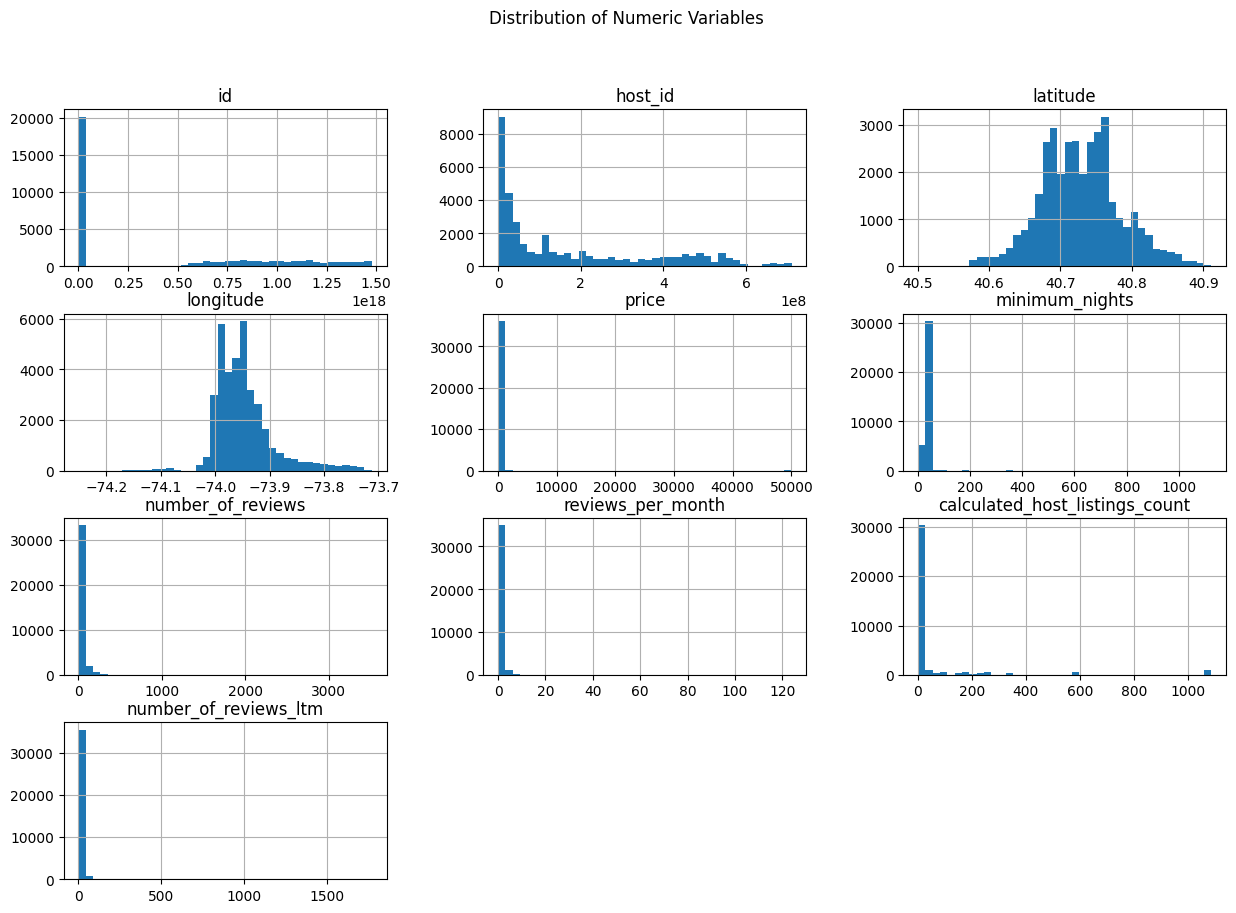

In [ ]:
import matplotlib.pyplot as plt
X_nyc_clean.hist(figsize=(15,10), bins=40)
plt.suptitle("Distribution of Numeric Variables")
plt.show()

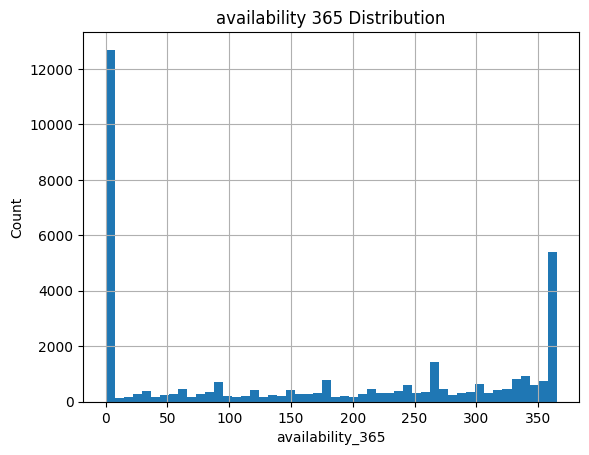

In [ ]:
y_nyc_clean.hist(bins=50)
plt.title("availability 365 Distribution")
plt.xlabel("availability_365")
plt.ylabel("Count")
plt.show()

**Step 2: Outlier Detection and Treatment**
- Identify outliers using statistical methods (IQR, percentiles)
- Document outlier analysis for key features (especially price)
- Apply 5th/95th percentile clipping to handle extreme values
- Justify outlier treatment decisions with business logic
- Compare correlations before and after outlier treatment
- Ensure X and y remain aligned throughout cleaning process


In [ ]:
X_nyc_clean.id

,id
0,2539
1,2595
2,6848
3,6872
4,6990
...,...
36398,1477577159825120952
36399,1477579321816059355
36400,1477638736750797835
36401,1477645804429880351


In [ ]:
print("="*80)
print("Step 2: Outlier Detection and Treatment")
print("="*80)

# Identify outliers using IQR
print("\nIdentifying Outliers using IQR method")
numeric_cols = X_nyc_clean.select_dtypes(include=[np.number]).columns

outlier_counts = {}

for col in numeric_cols:
    Q1 = X_nyc_clean[col].quantile(0.25)
    Q3 = X_nyc_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((X_nyc_clean[col] < lower) | (X_nyc_clean[col] > upper)).sum()
    if outliers > 0:
        outlier_counts[col] = outliers

        print(f"{col}: {outliers} outliers "
              f"({(outliers/len(X_nyc_clean)*100):.2f}% of data)")

print("="*80)
print("Outlier Detection using Percentile Method")
print("="*80)

X_nyc_percentile = X_nyc_clean.copy()

# Define percentile thresholds
lower_percentile = 0.05  # 5th percentile
upper_percentile = 0.95  # 95th percentile

for col in numeric_cols:
    lower_bound = X_nyc_percentile[col].quantile(lower_percentile)
    upper_bound = X_nyc_percentile[col].quantile(upper_percentile)

    # Identify outliers
    outliers = X_nyc_percentile[(X_nyc_percentile[col] < lower_bound) | (X_nyc_percentile[col] > upper_bound)]
    outlier_count = len(outliers)

    print(f"{col}: {outlier_count} outliers "
          f"({(outlier_count/len(X_nyc_percentile)*100):.2f}% of data)")

print("="*80)
print("Documenting Outlier Analysis for Key Features")
print("="*80)

# Focus on key features such as price and availability_365 (if available)
key_features = [col for col in ['price', 'availability_365'] if col in X_nyc_clean.columns]

for col in key_features:
    print(f"\n---- {col} ----")
    print(f"Before Treatment:\n{X_nyc_clean[col].describe()}")

# Applying 5th/95th Percentile Clipping for extreme values

X_nyc_outliers = X_nyc_clean.copy()

for col in numeric_cols:
    lower = X_nyc_outliers[col].quantile(0.05)
    upper = X_nyc_outliers[col].quantile(0.95)
    X_nyc_outliers[col] = np.clip(X_nyc_outliers[col], lower, upper)

print("="*80)
print("Justifying Outlier Treatment Decisions")
print("="*80)
print("""
- Extreme values can mislead statistics of features.
- Many algorithms (like Linear Regression, Ridge, Lasso) are sensitive to extreme values. Outliers can pull the regression line or coefficients.
- After removing/capping outliers, the model learns true patterns instead of being biased by rare cases.
- 5th/95th percentile clipping keeps most realistic business scenarios.
- Prevents rare but unrealistic listings (e.g., $10,000/night or 0-day availability).
- Outlier treatment is important because it improves data quality, model accuracy, and interpretability, ensuring your conclusions reflect reality, not rare extremes.
""")

print("="*80)
print("Comparing Correlations Before and After Outlier Treatment")
print("="*80)

corr_before = X_nyc_clean.corrwith(y_nyc_clean)
corr_after = X_nyc_outliers.corrwith(y_nyc_clean)
corr_comparison = pd.concat([corr_before, corr_after], axis=1)
corr_comparison.columns = ['Before_Treatment', 'After_Treatment']

print(corr_comparison.sort_values(by='After_Treatment', ascending=False))

print("="*80)
# Check alignment
if len(X_nyc_outliers) == len(y_nyc_clean) and all(X_nyc_outliers.index == y_nyc_clean.index):
    print("X and y remain properly aligned after cleaning and outlier treatment.")
else:
    print("Misalignment detected! Check indices before modeling.")
print("="*80)

Step 2: Outlier Detection and Treatment

Identifying Outliers using IQR method
longitude: 2184 outliers (6.00% of data)
minimum_nights: 7491 outliers (20.58% of data)
number_of_reviews: 5040 outliers (13.85% of data)
reviews_per_month: 3281 outliers (9.01% of data)
calculated_host_listings_count: 6555 outliers (18.01% of data)
number_of_reviews_ltm: 6176 outliers (16.97% of data)
Outlier Detection using Percentile Method
id: 3642 outliers (10.00% of data)
host_id: 1821 outliers (5.00% of data)
latitude: 3642 outliers (10.00% of data)
longitude: 3642 outliers (10.00% of data)
price: 1821 outliers (5.00% of data)
minimum_nights: 0 outliers (0.00% of data)
number_of_reviews: 0 outliers (0.00% of data)
reviews_per_month: 0 outliers (0.00% of data)
calculated_host_listings_count: 0 outliers (0.00% of data)
number_of_reviews_ltm: 0 outliers (0.00% of data)
Documenting Outlier Analysis for Key Features

---- price ----
Before Treatment:
count    36403.000000
mean       300.088516
std        1

**Step 3: Feature Engineering and Selection**
- Remove non-predictive features (IDs, exact coordinates)
- Consider domain knowledge: which features make business sense?
- Handle categorical variables appropriately
- Create derived features if needed (but avoid complexity)
- Document rationale for including/excluding each feature
- Check for multicollinearity among selected features


In [ ]:
X_nyc_clean.columns

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'number_of_reviews_ltm'],
      dtype='object')

In [ ]:
print("="*80)
print("Step 3: Feature Engineering and Selection")
print("="*80)

# Remove non-predictive features (IDs, coordinates)
non_predictive_features = ['id', 'host_id', 'latitude', 'longitude']
features_to_keep = [col for col in X_nyc_outliers.columns if col not in non_predictive_features]
X_nyc_selected = X_nyc_outliers[features_to_keep]

print(f"Removed non-predictive features: {non_predictive_features}")
print(f"Remaining features: {features_to_keep}")

print("="*80)
print("Considering Domain Knowledge")
print("""
- All remaining features are meaningful and non-overlapping, so there is no need to remove any of them.
""")

print("="*80)
print("Handling Categorical Variables")
print(f"Columns which has string datatype{X_nyc_selected.select_dtypes('object').columns}")
print("""
- No categorical variables to handle.
""")

print("="*80)
print("Creating Derived Features")
# Create the derived feature
X_nyc_selected = X_nyc_selected.copy()
X_nyc_selected.loc[:, 'host_activity_level'] = (X_nyc_selected['reviews_per_month'] * (X_nyc_selected['calculated_host_listings_count']))

# check its relationship with availability
corr = X_nyc_selected['host_activity_level'].corr(y_nyc_clean)
print(f"Correlation between host_activity_level and availability_365: {corr:.4f}")
print(f"\nFeatures after adding derived feature: \n{X_nyc_selected.columns}")

print("="*80)
print("Checking for Multicollinearity")
corr_matrix = X_nyc_selected.corr().abs()
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > 0.9:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

print(f"Found {len(high_corr_pairs)} highly correlated pairs (>0.9):")
for pair in high_corr_pairs[:5]:
    print(f"  {pair[0]} - {pair[1]}: {pair[2]:.3f}")

print("="*80)
print("Documenting Rationale for Including/Excluding Each Feature")
print("""
Selected Features and Rationale:
- price: Key economic factor influencing booking demand.
- minimum_nights: Determines booking flexibility and impacts occupancy.
- number_of_reviews: Reflects historical popularity and demand.
- reviews_per_month: Indicates recent booking activity and listing performance.
- calculated_host_listings_count: Captures host experience and property management scale.
- number_of_reviews_ltm: Shows recent engagement trends (used for potential short-term activity insight).
- host_activity_level (derived feature): Combines reviews_per_month and host listing count
                                         Represents overall host engagement and management activity, useful for understanding booking patterns.
""")
print("="*80)


Step 3: Feature Engineering and Selection
Removed non-predictive features: ['id', 'host_id', 'latitude', 'longitude']
Remaining features: ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'number_of_reviews_ltm']
Considering Domain Knowledge

- All remaining features are meaningful and non-overlapping, so there is no need to remove any of them.

Handling Categorical Variables
Columns which has string datatypeIndex([], dtype='object')

- No categorical variables to handle.

Creating Derived Features
Correlation between host_activity_level and availability_365: 0.2033

Features after adding derived feature: 
Index(['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'number_of_reviews_ltm',
       'host_activity_level'],
      dtype='object')
Checking for Multicollinearity
Found 0 highly correlated pairs (>0.9):
Documenting Rationale for Including/Excluding Each Feature

Select

**Step 4: Proper Data Splitting**
- Split NYC data into 80% train, 20% test (single split, no validation set needed)
- Use `random_state` for reproducibility
- Never look at test set during model development
- Preserve test set for final evaluation only


In [ ]:
print("="*80)
print("Step 4: Proper Data Splitting")
print("="*80)

from sklearn.model_selection import train_test_split
# Single split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_nyc_selected, y_nyc_clean, test_size=0.2, random_state=42
)

print(f"Training set shape:  X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Testing set shape:   X_test  = {X_test.shape}, y_test  = {y_test.shape}")

print("""
- Used an 80/20 train–test split to ensure a representative sample for both sets.
- random_state=42 ensures reproducibility across runs.
- The test set will remain untouched during model development.
- Only the training set will be used for model fitting, feature scaling, and cross-validation.
- The test set will be preserved for final performance evaluation.
""")
print("="*80)


Step 4: Proper Data Splitting
Training set shape:  X_train = (29122, 7), y_train = (29122,)
Testing set shape:   X_test  = (7281, 7), y_test  = (7281,)

- Used an 80/20 train–test split to ensure a representative sample for both sets.
- random_state=42 ensures reproducibility across runs.
- The test set will remain untouched during model development.
- Only the training set will be used for model fitting, feature scaling, and cross-validation.
- The test set will be preserved for final performance evaluation.



**Step 5: Feature Scaling**
- Apply StandardScaler to features
- Fit scaler ONLY on training data
- Transform both train and test sets using training parameters
- Document scaling approach for deployment


In [ ]:
X_train.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,number_of_reviews_ltm,host_activity_level
15742,84.000000,30,5,0.110000,4,1,0.440000
17470,447.871611,30,1,0.020000,1,0,0.020000
14127,98.000000,30,56,0.980000,1,0,0.980000
24129,333.000000,31,0,0.816339,331,0,270.208149
16703,447.871611,30,1,0.020000,331,0,6.620000


In [ ]:
print("="*80)
print("Step 5: Feature Scaling")
print("="*80)

from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize the StandardScaler
scaler = StandardScaler()
# All columns are numeric and number_of_reviews, number_of_reviews, calculated_host_listings_count, host_activity_level, price needs scaling
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Mean of scaled training data (should be close to 0):", X_train_scaled.mean(axis=0).round(4))
print("Std of scaled training data  (should be close to 1):", X_train_scaled.std(axis=0).round(4))

print("""
- StandardScaler standardizes numeric features to mean = 0 and std = 1.
- The scaler was fitted only on the training data to prevent information leakage.
- The same scaling parameters (mean and std) were applied to the test data.
- This ensures consistent preprocessing during model training and deployment.
""")
print("="*80)

Step 5: Feature Scaling
Mean of scaled training data (should be close to 0): [ 0.  0. -0.  0. -0. -0. -0.]
Std of scaled training data  (should be close to 1): [1. 1. 1. 1. 1. 1. 1.]

- StandardScaler standardizes numeric features to mean = 0 and std = 1.
- The scaler was fitted only on the training data to prevent information leakage.
- The same scaling parameters (mean and std) were applied to the test data.
- This ensures consistent preprocessing during model training and deployment.



**Step 6: Model Selection with Cross-Validation**
- Test multiple model types: Linear Regression, Ridge, Lasso
- Use GridSearchCV with 5-fold cross-validation for hyperparameter tuning
- Compare models based on CV performance (RMSE, MAE, R²)
- Select best model based on validation metrics, not training metrics
- Document why certain models performed better than others


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("="*80)
print("Step 6: Model Selection with Cross-Validation")
print("="*80)

# Mean baseline
mean_pred = np.mean(y_train)
y_pred_mean = np.repeat(mean_pred, len(y_test))
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_pred_mean))
baseline_mae  = mean_absolute_error(y_test, y_pred_mean)
baseline_r2   = r2_score(y_test, y_pred_mean)
print(f"Mean baseline = RMSE: {baseline_rmse:.4f}, MAE: {baseline_mae:.4f}, R²: {baseline_r2:.4f}")

# Median baseline
baseline_pred = np.median(y_train)
y_baseline = np.repeat(baseline_pred, len(y_test))
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_baseline))
baseline_mae  = mean_absolute_error(y_test, y_baseline)
baseline_r2   = r2_score(y_test, y_baseline)
print(f"Baseline (median) = RMSE: {baseline_rmse:.4f}, MAE: {baseline_mae:.4f}, R2: {baseline_r2:.4f}")

# Test multiple model types: Linear Regression, Ridge, Lasso
print("="*80)
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(max_iter=5000)
}

param_grid = {
    "Ridge": {"alpha": [0.01, 0.1, 1.0, 1.0, 50.0]},
    "Lasso": {"alpha": [0.0001, 0.001, 0.01, 0.1, 1.0]}
}

cv_results = {}

# Linear Regression
def cv_metrics(est, X, y, cv=5):
    neg_mse = cross_val_score(est, X, y, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1)
    neg_mae = cross_val_score(est, X, y, cv=cv, scoring="neg_mean_absolute_error", n_jobs=-1)
    r2      = cross_val_score(est, X, y, cv=cv, scoring="r2", n_jobs=-1)
    return np.sqrt(-neg_mse).mean(), (-neg_mae).mean(), r2.mean()

lr = models["Linear"]
lr_rmse, lr_mae, lr_r2 = cv_metrics(lr, X_train_scaled, y_train)
cv_results["Linear"] = {"model": lr, "cv_RMSE": lr_rmse, "cv_MAE": lr_mae, "cv_R2": lr_r2}
print(f"LinearRegression CV = RMSE: {lr_rmse:.4f}, MAE: {lr_mae:.4f}, R2: {lr_r2:.4f}")
print("="*80)

# Ridge
ridge_gs = GridSearchCV(models["Ridge"], param_grid["Ridge"],
                        cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
ridge_gs.fit(X_train_scaled, y_train)
best_ridge = ridge_gs.best_estimator_
ridge_rmse = np.sqrt(-ridge_gs.best_score_)
ridge_mae  = -cross_val_score(best_ridge, X_train_scaled, y_train, cv=5,
                              scoring="neg_mean_absolute_error", n_jobs=-1).mean()
ridge_r2   = cross_val_score(best_ridge, X_train_scaled, y_train, cv=5,
                             scoring="r2", n_jobs=-1).mean()
cv_results["Ridge"] = {"model": best_ridge, "cv_RMSE": ridge_rmse,
                       "cv_MAE": ridge_mae, "cv_R2": ridge_r2,
                       "params": ridge_gs.best_params_}
print(f"Ridge CV = RMSE: {ridge_rmse:.4f}, MAE: {ridge_mae:.4f}, R2: {ridge_r2:.4f}, best_params: {ridge_gs.best_params_}")
print("="*80)

# Lasso
lasso_gs = GridSearchCV(models["Lasso"], param_grid["Lasso"],
                        cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
lasso_gs.fit(X_train_scaled, y_train)
best_lasso = lasso_gs.best_estimator_
lasso_rmse = np.sqrt(-lasso_gs.best_score_)
lasso_mae  = -cross_val_score(best_lasso, X_train_scaled, y_train, cv=5,
                              scoring="neg_mean_absolute_error", n_jobs=-1).mean()
lasso_r2   = cross_val_score(best_lasso, X_train_scaled, y_train, cv=5,
                             scoring="r2", n_jobs=-1).mean()
cv_results["Lasso"] = {"model": best_lasso, "cv_RMSE": lasso_rmse,
                       "cv_MAE": lasso_mae, "cv_R2": lasso_r2,
                       "params": lasso_gs.best_params_}
print(f"Lasso CV = RMSE: {lasso_rmse:.4f}, MAE: {lasso_mae:.4f}, R2: {lasso_r2:.4f}, best_params: {lasso_gs.best_params_}")
print("="*80)

# Compare models by CV RMSE
summary = sorted(
    [(m, v["cv_RMSE"], v["cv_MAE"], v["cv_R2"], v.get("params", {}))
     for m, v in cv_results.items()],
    key=lambda x: x[1]
)

print("\nCross-Validation Summary (sorted by CV RMSE):")
print("{:<10} {:>8} {:>8} {:>8} {:>20}".format("Model", "CV_RMSE", "CV_MAE", "CV_R2", "Params"))
for m, rm, ma, r2, p in summary:
    print("{:<10} {:8.4f} {:8.4f} {:8.4f} {:>20}".format(m, rm, ma, r2, str(p)))

best_model_name = summary[0][0]
best_model = cv_results[best_model_name]["model"]
print(f"\nSelected best model based on lowest CV RMSE: {best_model_name}")
print("="*80)

# Refit best model on full training data and evaluate on test set
best_model.fit(X_train_scaled, y_train)

# Baseline vs model comparison + rationale
print("\nBaseline RMSE: {:.4f} | Selected Model RMSE: {:.4f}".format(baseline_rmse, lr_rmse))
if lr_rmse < baseline_rmse:
    print("The selected model outperforms the baseline.")
else:
    print("The model does not beat the baseline.")

print("\nModel Selection Rationale:")
if best_model_name == "Linear":
    print("Linear Regression performed best, implying roughly linear relationships and little benefit from regularization.")
elif best_model_name == "Ridge":
    print("Ridge (L2 regularization) performed best, indicating regularization reduced overfitting and stabilized coefficients.")
elif best_model_name == "Lasso":
    print("Lasso (L1 regularization) performed best, suggesting sparsity and feature selection improved performance.")
else:
    print("Model chosen purely by lowest CV RMSE.")

print("="*80)

Step 6: Model Selection with Cross-Validation
Mean baseline = RMSE: 147.0323, MAE: 136.1984, R²: -0.0000
Baseline (median) = RMSE: 147.2372, MAE: 136.0913, R2: -0.0028
LinearRegression CV = RMSE: 118.7918, MAE: 99.2908, R2: 0.3506
Ridge CV = RMSE: 118.7936, MAE: 99.3501, R2: 0.3506, best_params: {'alpha': 50.0}
Lasso CV = RMSE: 118.7937, MAE: 99.2913, R2: 0.3506, best_params: {'alpha': 0.001}

Cross-Validation Summary (sorted by CV RMSE):
Model       CV_RMSE   CV_MAE    CV_R2               Params
Linear     118.7918  99.2908   0.3506                   {}
Ridge      118.7936  99.3501   0.3506      {'alpha': 50.0}
Lasso      118.7937  99.2913   0.3506     {'alpha': 0.001}

Selected best model based on lowest CV RMSE: Linear

Baseline RMSE: 147.2372 | Selected Model RMSE: 118.7918
The selected model outperforms the baseline.

Model Selection Rationale:
Linear Regression performed best, implying roughly linear relationships and little benefit from regularization.


**Step 7: Final Model Evaluation**
- Evaluate selected model on held-out NYC test set (used only once)
- Compare against simple baseline (median prediction)
- Calculate performance metrics: RMSE, MAE, R²
- Ensure model beats baseline to justify complexity
- Document final model performance and characteristics


In [ ]:
print("="*80)
print("Step 7: Final Model Evaluation")
print("="*80)

# Evaluate selected model on the held-out NYC test set (never used during training)
y_pred_test = best_model.predict(X_test_scaled)

# Compute evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae  = mean_absolute_error(y_test, y_pred_test)
r2   = r2_score(y_test, y_pred_test)

# Compare against median baseline
median_pred = np.median(y_train)
y_pred_baseline = np.repeat(median_pred, len(y_test))
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_pred_baseline))
baseline_mae  = mean_absolute_error(y_test, y_pred_baseline)
baseline_r2   = r2_score(y_test, y_pred_baseline)

# Print model vs baseline comparison
print(f"Selected Model ({best_model.__class__.__name__}) Performance:")
print(f" RMSE: {rmse:.4f}")
print(f" MAE : {mae:.4f}")
print(f" R²  : {r2:.4f}\n")

print(f"Baseline (Median Prediction) Performance:")
print(f" RMSE: {baseline_rmse:.4f}")
print(f" MAE : {baseline_mae:.4f}")
print(f" R²  : {baseline_r2:.4f}\n")

# Check if model beats baseline
if rmse < baseline_rmse:
    print("The model outperforms the baseline.")
else:
    print("The model does not outperform the baseline.")

print("="*80)
print("Model Performance Summary")
print("="*80)
print(f"""
Final Model: {best_model.__class__.__name__}
Evaluation Set: NYC test data
Performance Metrics:
    - RMSE: {rmse:.4f}
    - MAE : {mae:.4f}
    - R²  : {r2:.4f}

Baseline (Median Predictor):
    - RMSE: {baseline_rmse:.4f}
    - MAE : {baseline_mae:.4f}
    - R²  : {baseline_r2:.4f}

- The final model was evaluated only once on the hold-out test set to ensure unbiased results.
- Model performance is compared against a simple median-based baseline.
- Improvement over the baseline confirms that the model captures meaningful relationships
  between listing features and availability in NYC.
""")
print("="*80)


Step 7: Final Model Evaluation
Selected Model (LinearRegression) Performance:
 RMSE: 118.9292
 MAE : 99.4278
 R²  : 0.3457

Baseline (Median Prediction) Performance:
 RMSE: 147.2372
 MAE : 136.0913
 R²  : -0.0028

The model outperforms the baseline.
Model Performance Summary

Final Model: LinearRegression
Evaluation Set: NYC test data
Performance Metrics:
    - RMSE: 118.9292
    - MAE : 99.4278
    - R²  : 0.3457

Baseline (Median Predictor):
    - RMSE: 147.2372
    - MAE : 136.0913
    - R²  : -0.0028

- The final model was evaluated only once on the hold-out test set to ensure unbiased results.
- Model performance is compared against a simple median-based baseline.
- Improvement over the baseline confirms that the model captures meaningful relationships 
  between listing features and availability in NYC.



**Step 8: Jersey City Deployment with Proper Preprocessing**
- Apply identical data cleaning pipeline to Jersey City data
- Use same outlier clipping thresholds learned from NYC (5th/95th percentiles)
- Apply same feature scaling using NYC scaler parameters
- Make predictions and evaluate performance
- Compare against Jersey City baseline
- **Important Note**: We do NOT retrain on Jersey City data - in real business scenarios, you must deploy with the model you have, as retraining opportunities may not exist


In [ ]:
jc_df.shape

(1798, 18)

In [ ]:
jc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798 entries, 0 to 1797
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1798 non-null   int64  
 1   name                            1798 non-null   object 
 2   host_id                         1798 non-null   int64  
 3   host_name                       1696 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   1798 non-null   object 
 6   latitude                        1798 non-null   float64
 7   longitude                       1798 non-null   float64
 8   room_type                       1798 non-null   object 
 9   price                           1620 non-null   float64
 10  minimum_nights                  1798 non-null   int64  
 11  number_of_reviews               1798 non-null   int64  
 12  last_review                     14

In [ ]:
y_jc = jc_df.availability_365
X_jc = jc_df.select_dtypes('number').drop(columns=['availability_365'])

In [ ]:
print("="*80)
print("Comprehensive Exploratory Data Analysis for Jersey City")
print("="*80)

# Target Analysis
print("Target Variable Analysis")
print(f"\nMissing Target Variable Count: {y_jc.isnull().sum()}")
print(f"Targt variable Statistics \n{y_jc.describe()}")
print("="*80)

# Features Analysis
print("Feature Set Analysis")
print(f"\nTotal features: {len(X_jc.columns)}")
print(f"Features with missing values: {X_jc.isnull().any().sum()}")
print(f"\nMissing Feature Values \n{X_jc.isnull().sum()[X_jc.isnull().sum() > 0]}")
print(f"\nMissing Feature values percentage \n{X_jc.isnull().mean()[X_jc.isnull().mean() > 0] * 100}")
print("="*80)

# If there is any missing target variable then remove the row
y_jc_clean = y_jc.dropna()
X_jc_clean = X_jc.loc[y_jc_clean.index]

# To handle null values in features set, insert mean values
X_jc_clean = X_jc_clean.fillna(X_jc_clean.mean())

# Printing features after cleaning
print("Feature Set After Cleaning")
print(f"\nAfter cleaning: {len(y_jc_clean)} properties, {X_jc_clean.shape[1]} features")
print("="*80)

# Feature set statistics and correlation with target variable
print("Feature Set Statistics")
print(f"\nFeatures Statistics \n{X_jc_clean.describe()}")
print("="*80)
print("Correlation Matrix")
print(f"\n{X_jc_clean.corrwith(y_jc_clean).sort_values(ascending= False)}")
print("="*80)


Comprehensive Exploratory Data Analysis for Jersey City
Target Variable Analysis

Missing Target Variable Count: 0
Targt variable Statistics 
count    1798.000000
mean      219.684650
std       119.538382
min         0.000000
25%       108.000000
50%       246.000000
75%       333.000000
max       365.000000
Name: availability_365, dtype: float64
Feature Set Analysis

Total features: 11
Features with missing values: 3

Missing Feature Values 
neighbourhood_group    1798
price                   178
reviews_per_month       300
dtype: int64

Missing Feature values percentage 
neighbourhood_group    100.000000
price                    9.899889
reviews_per_month       16.685206
dtype: float64
Feature Set After Cleaning

After cleaning: 1798 properties, 11 features
Feature Set Statistics

Features Statistics 
                 id       host_id  neighbourhood_group     latitude  \
count  1.798000e+03  1.798000e+03                  0.0  1798.000000   
mean   8.177567e+17  2.105500e+08          

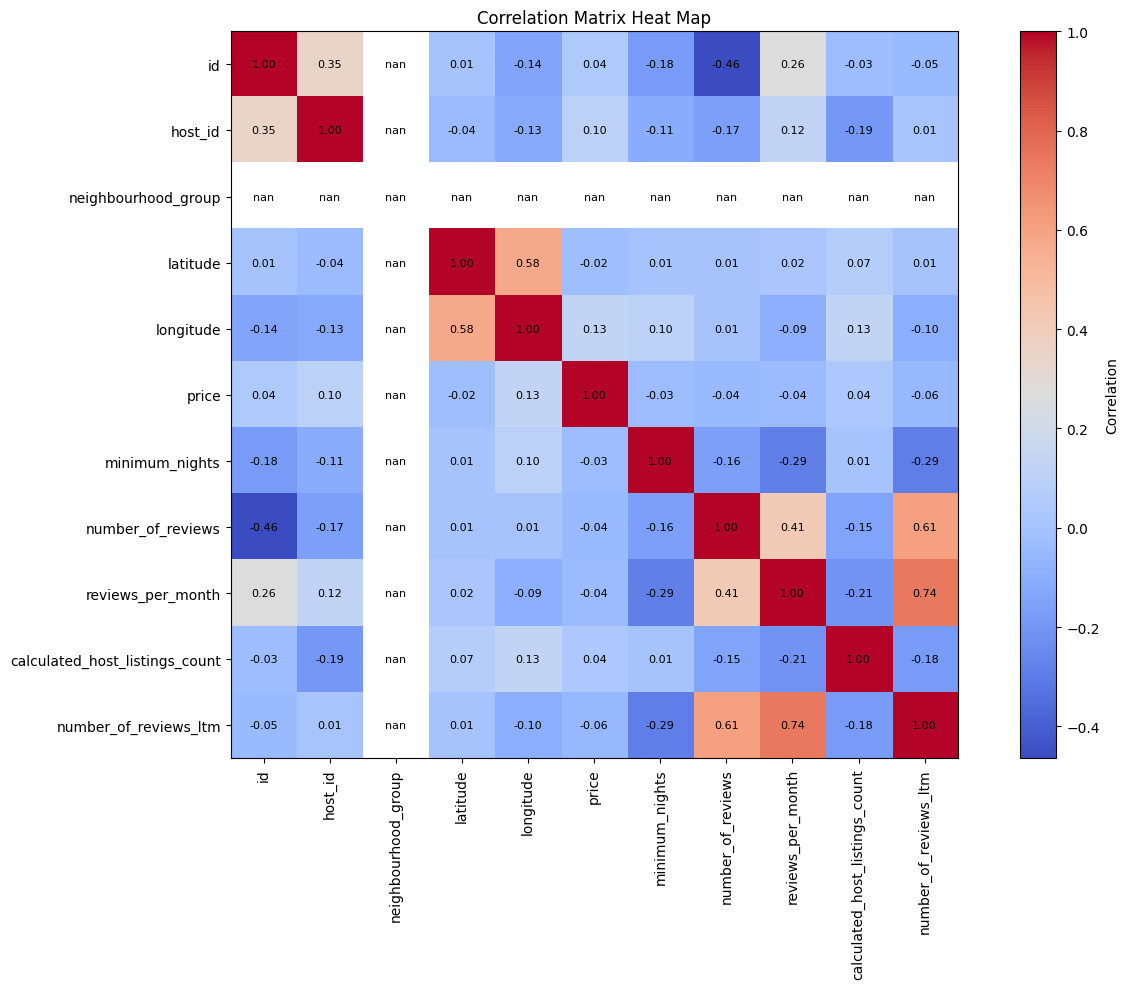

In [ ]:
import numpy as np
corr_nyc = X_jc_clean.corr()
plt.figure(figsize=(14,10))
plt.imshow(corr_nyc, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation')
for i in range(len(corr_nyc.columns)):
    for j in range(len(corr_nyc.columns)):
        plt.text(j, i, f"{corr_nyc.iloc[i, j]:.2f}",
                 ha='center', va='center', color='black', fontsize=8)
plt.xticks(ticks=np.arange(len(corr_nyc.columns)), labels=corr_nyc.columns, rotation=90)
plt.yticks(ticks=np.arange(len(corr_nyc.columns)), labels=corr_nyc.columns)
plt.title("Correlation Matrix Heat Map")
plt.tight_layout()
plt.show()

In [ ]:
print("="*80)
print("Step 8: Jersey City Deployment with NYC preprocessing")
print("="*80)

# Required objects from NYC pipeline
required = ['X_train', 'scaler', 'best_model', 'X_nyc_selected']
missing = [name for name in required if name not in globals()]
if missing:
  print("ERROR: Missing required NYC artifacts:", missing)
  print("Run NYC pipeline (train, fit scaler, choose best_model) before Step 8.")
else:
  # Check JC data existence
  if 'X_jc_clean' not in globals() or 'y_jc_clean' not in globals():
      print("ERROR: X_jc_clean and y_jc_clean must be prepared. Run JC cleaning first.")
  else:

      # 1. If percentile_bounds not present, compute from NYC training data (fit on X_train)
      if 'percentile_bounds' not in globals():
        print("percentile_bounds not found - computing 5th/95th bounds from NYC training data (X_train).")
        percentile_bounds = {}
        numeric_cols_train = X_train.select_dtypes(include=[np.number]).columns
        for c in numeric_cols_train:
            l = X_train[c].quantile(0.05)
            u = X_train[c].quantile(0.95)
            percentile_bounds[c] = (l, u)
        # keep percentile_bounds in globals for reuse
      else:
        print("Using existing percentile_bounds learned from NYC.")
      print("="*80)

      # 2. Apply NYC 5th/95th clipping where applicable
      print("\nApplying NYC percentile clipping (5th/95th) to JC features.")
      for col, (low, high) in percentile_bounds.items():
        if col in X_jc_clean.columns:
          # only attempt numeric-safe clip
          try:
            X_jc_clean[col] = X_jc_clean[col].clip(lower=low, upper=high)
          except Exception:
            # if non-numeric or incompatible, skip
            pass

      # 3. Drop non-predictive features if present (same list used for NYC)
      features_to_drop_jc = [c for c in non_predictive_features if c in X_jc_clean.columns]
      if features_to_drop_jc:
        X_jc_clean = X_jc_clean.drop(columns=features_to_drop_jc)
      print("non-predictive columns:", non_predictive_features)
      print("Keepping features from JC:", X_jc_clean.columns)
      print("="*80)

      # 4. Create derived features used in NYC model
      expected_cols = list(X_nyc_selected.columns)  # features used to train model
      created = []
      # host_activity_level = reviews_per_month * calculated_host_listings_count
      if 'host_activity_level' in expected_cols and 'host_activity_level' not in X_jc_clean.columns:
        X_jc_clean.loc[:, 'host_activity_level'] = (X_jc_clean['reviews_per_month'] *X_jc_clean['calculated_host_listings_count'])
        print(f"Features after inserting derived column {X_jc_clean.columns}")
    # X_nyc_selected.loc[:, 'host_activity_level'] = (X_nyc_selected['reviews_per_month'] * (X_nyc_selected['calculated_host_listings_count']))
      print("="*80)

      # 5. Align JC columns with NYC training feature order
      # Ensure all expected columns exist in JC; missing ones filled with 0
      print(f"\nAligning JC features to NYC training feature set ({len(expected_cols)} columns expected).")
      X_jc_aligned = X_jc_clean.reindex(columns=expected_cols, fill_value=np.nan)

      # Quick diagnostics
      missing_after_align = [c for c in expected_cols if c not in X_jc_aligned.columns]
      extra_cols = [c for c in X_jc_aligned.columns if c not in expected_cols]
      print(f"After reindex: JC shape = {X_jc_aligned.shape}")
      if missing_after_align:
        print("Warning: Missing expected columns (will be filled with np.nan):", missing_after_align)
      if extra_cols:
        print("Note: Extra columns present (dropped):", extra_cols[:10])

      # 6. Ensure numeric dtype and same column order as X_train used to fit scaler
      # scaler was fitted on X_train (DataFrame) columns order — ensure we use same order
      train_cols_order = list(X_train.columns)
      # Reindex again to scaler's order (if identical to expected_cols this is no-op)
      X_jc_final = X_jc_aligned.reindex(columns=train_cols_order, fill_value=np.nan)

      # shape matches scaler expectations
      if X_jc_final.shape[1] != len(train_cols_order):
        raise ValueError("Column count mismatch between JC features and NYC training features expected by scaler/model.")
      print(f"Final JC features shape: {X_jc_final.shape}")
      print("="*80)

      # 7) Scale using NYC scaler
      try:
        X_jc_scaled = scaler.transform(X_jc_final)
      except Exception as e:
        print("ERROR while scaling JC features:", e)
        print("Ensure scaler was fit on X_train with same column order. Exiting Step 8.")
        raise

      # 8) Predict with NYC-trained model (do NOT retrain)
      print("\nMaking predictions on Jersey City using NYC-trained model (no retraining).")
      y_jc_pred = best_model.predict(X_jc_scaled)

      # 9) Evaluate if JC ground-truth exists
      print("\nEvaluating Jersey City predictions.")
      if len(y_jc_clean) != len(y_jc_pred):
        print("WARNING: length mismatch between JC target and predictions. Check indexing/alignments.")
      else:
        rmse_jc = np.sqrt(mean_squared_error(y_jc_clean, y_jc_pred))
        mae_jc  = mean_absolute_error(y_jc_clean, y_jc_pred)
        r2_jc   = r2_score(y_jc_clean, y_jc_pred)

        # JC baseline (median of JC target)
        median_jc = np.median(y_jc_clean)
        baseline_pred_jc = np.repeat(median_jc, len(y_jc_clean))
        baseline_rmse_jc = np.sqrt(mean_squared_error(y_jc_clean, baseline_pred_jc))
        baseline_mae_jc  = mean_absolute_error(y_jc_clean, baseline_pred_jc)
        baseline_r2_jc   = r2_score(y_jc_clean, baseline_pred_jc)

        print(f"\nJersey City Performance (NYC model): RMSE={rmse_jc:.4f}, MAE={mae_jc:.4f}, R2={r2_jc:.4f}")
        print(f"Jersey City Baseline (median):       RMSE={baseline_rmse_jc:.4f}, MAE={baseline_mae_jc:.4f}, R2={baseline_r2_jc:.4f}\n")

        if rmse_jc < baseline_rmse_jc:
          print("NYC model improves over JC median baseline — acceptable for deployment (monitor closely).")
        else:
          print("NYC model does NOT beat JC median baseline — deployment risk; consider JC-specific retraining/feature adaptation.")

      print("\nImportant: This is a pure deployment test — NO retraining performed on JC data.")
      print("="*80)


Step 8: Jersey City Deployment with NYC preprocessing
Using existing percentile_bounds learned from NYC.

Applying NYC percentile clipping (5th/95th) to JC features.
non-predictive columns: ['id', 'host_id', 'latitude', 'longitude']
Keepping features from JC: Index(['neighbourhood_group', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'number_of_reviews_ltm', 'host_activity_level'],
      dtype='object')

Aligning JC features to NYC training feature set (7 columns expected).
After reindex: JC shape = (1798, 7)
Final JC features shape: (1798, 7)

Making predictions on Jersey City using NYC-trained model (no retraining).

Evaluating Jersey City predictions.

Jersey City Performance (NYC model): RMSE=136.1314, MAE=111.3912, R2=-0.2976
Jersey City Baseline (median):       RMSE=122.3682, MAE=104.1051, R2=-0.0485

NYC model does NOT beat JC median baseline — deployment risk; consider JC-specific retraining/feature adaptati

**Step 9: Statistical Market Comparison**
- Conduct t-tests, Levene's test, KS test to compare NYC vs JC distributions
- Calculate Cohen's d for effect size
- Assess market similarity statistically, not arbitrarily
- Document market differences and deployment risk assessment


In [ ]:
from scipy import stats

print("="*80)
print("Step 9: Statistical Market Comparison (NYC train vs Jersey City)")
print("="*80)

required = ['X_train', 'X_jc_clean', 'y_train', 'y_jc_clean']
missing = [name for name in required if name not in globals()]
if missing:
  print("ERROR: Missing required objects:", missing)
else:

  # Numeric columns common to both datasets
  common_numeric = [c for c in nyc_df.select_dtypes(include=[np.number]).columns if c in jc_df.columns]
  # We'll also include the target variable for comparison
  features_to_test = ['__target__'] + common_numeric

  # helper: Cohen's d (pooled std). If pooled denom <=0 fall back to alternative.
  def cohens_d(a, b):
    a = np.asarray(a); b = np.asarray(b)
    na = len(a); nb = len(b)
    if na < 2 or nb < 2:
        return np.nan
    sa = a.std(ddof=1); sb = b.std(ddof=1)
    # pooled std
    dof = na + nb - 2
    if dof > 0:
        pooled_var = ((na - 1)*(sa**2) + (nb - 1)*(sb**2)) / dof
        pooled_std = np.sqrt(pooled_var) if pooled_var > 0 else np.nan
    else:
        pooled_std = np.nan
    if np.isnan(pooled_std) or pooled_std == 0:
        # fallback: average std
        pooled_std = np.sqrt((sa**2 + sb**2) / 2.0)
    if pooled_std == 0:
        return 0.0
    return (a.mean() - b.mean()) / pooled_std

rows = []
alpha = 0.05  # significance threshold

# test target
print("Comparing target distribution (availability / target)")
a = np.asarray(y_nyc_clean)
b = np.asarray(y_jc_clean)

# Levene for equal variances (center='median' is robust)
try:
  levene_p = stats.levene(a, b, center='median').pvalue
except Exception:
  levene_p = np.nan

# Welch t-test (unequal variances)
try:
  t_stat, t_p = stats.ttest_ind(a, b, equal_var=False, nan_policy='omit')
except Exception:
  t_p = np.nan

# KS test
try:
  ks_stat, ks_p = stats.ks_2samp(a, b, alternative='two-sided', mode='auto')
except Exception:
  ks_p = np.nan

d = cohens_d(a, b)
rows.append({
    'feature': 'availability_365',
    'nyc_n': len(a), 'jc_n': len(b),
    'nyc_mean': np.nanmean(a), 'jc_mean': np.nanmean(b),
    'levene_p': levene_p, 't_p': t_p, 'ks_p': ks_p, 'cohens_d': d
})

# test each numeric feature
for col in common_numeric:
  a = np.asarray(nyc_df[col].dropna()).astype(float)
  b = np.asarray(jc_df[col].dropna()).astype(float)
  if len(a) < 2 or len(b) < 2:
    # skip insufficient data
    rows.append({'feature': col, 'nyc_n': len(a), 'jc_n': len(b),
                'nyc_mean': np.nan, 'jc_mean': np.nan,
                'levene_p': np.nan, 't_p': np.nan, 'ks_p': np.nan, 'cohens_d': np.nan})
    continue
  try:
    levene_p = stats.levene(a, b, center='median').pvalue
  except Exception:
    levene_p = np.nan

  try:
    t_stat, t_p = stats.ttest_ind(a, b, equal_var=False, nan_policy='omit')
  except Exception:
    t_p = np.nan

  try:
    ks_stat, ks_p = stats.ks_2samp(a, b, alternative='two-sided', mode='auto')
  except Exception:
    ks_p = np.nan

  d = cohens_d(a, b)
  rows.append({
      'feature': col,
      'nyc_n': len(a), 'jc_n': len(b),
      'nyc_mean': np.nanmean(a), 'jc_mean': np.nanmean(b),
      'levene_p': levene_p, 't_p': t_p, 'ks_p': ks_p, 'cohens_d': d
  })

result_df = pd.DataFrame(rows)
# Add simple interpretation columns
def interpret_row(r):
  notes = []
  # variance equality
  if pd.notnull(r['levene_p']):
    if r['levene_p'] < alpha:
      notes.append('variance_diff')

  # mean difference
  if pd.notnull(r['t_p']):
    if r['t_p'] < alpha:
      notes.append('mean_diff')

  # distribution difference
  if pd.notnull(r['ks_p']):
    if r['ks_p'] < alpha:
      notes.append('dist_diff')

  # effect size
  d = r.get('cohens_d', np.nan)
  if pd.notnull(d):
    absd = abs(d)
    if absd < 0.2:
        es = 'small'
    elif absd < 0.5:
      es = 'medium'
    else:
      es = 'large'
    notes.append(f"effect_{es}")

  # final recommendation
  if ('mean_diff' in notes or 'dist_diff' in notes) and (pd.notnull(d) and abs(r['cohens_d']) >= 0.5):
    rec = 'High difference (large effect) -> deploy with caution / retrain recommended'
  elif ('mean_diff' in notes or 'dist_diff' in notes) and (pd.notnull(d) and 0.2 <= abs(r['cohens_d']) < 0.5):
    rec = 'Moderate difference -> consider adaptation or monitoring'
  elif ('mean_diff' in notes or 'dist_diff' in notes):
    rec = 'Statistically different but small effect -> monitor'
  else:
    rec = 'No meaningful difference -> low deployment risk'
  return ','.join(notes) if notes else 'no_significant_findings', rec

interp = result_df.apply(interpret_row, axis=1, result_type='expand')
result_df['findings'] = interp[0]
result_df['deployment_recommendation'] = interp[1]

# organize columns and print
cols = ['feature','nyc_n','jc_n','nyc_mean','jc_mean','cohens_d','levene_p','t_p','ks_p','findings','deployment_recommendation']
print("\nStatistical comparison summary (NYC train vs JC):")
pd.set_option('display.float_format', lambda x: f"{x:0.4f}")
print(result_df[cols].sort_values(by='cohens_d', key=lambda s: s.abs(), ascending=False).to_string(index=False))
print("="*80)

print("""
- Tests: Levene (variance), Welch t-test (means, unequal variances), KS (distribution shapes).
- Cohen's d interpretation: small<0.2, medium ~0.5, large>0.8 (we use 0.5 as moderate-large threshold).
- 'deployment_recommendation' is a simple rule-of-thumb; use business context to make final call.
""")
print("="*80)

Step 9: Statistical Market Comparison (NYC train vs Jersey City)
Comparing target distribution (availability / target)

Statistical comparison summary (NYC train vs JC):
                       feature  nyc_n  jc_n  nyc_mean  jc_mean  cohens_d  levene_p    t_p   ks_p                                        findings                                                   deployment_recommendation
         number_of_reviews_ltm  29122  1798    2.6033  10.5862   -1.1038    0.0000 0.0000 0.0000  variance_diff,mean_diff,dist_diff,effect_large High difference (large effect) -> deploy with caution / retrain recommended
             reviews_per_month  29122  1798    0.7087   1.5029   -1.1035    0.0000 0.0000 0.0000  variance_diff,mean_diff,dist_diff,effect_large High difference (large effect) -> deploy with caution / retrain recommended
                minimum_nights  29122  1798   26.0239  15.1196    1.0769    0.0000 0.0000 0.0000  variance_diff,mean_diff,dist_diff,effect_large High difference (large

**Step 10: Deployment Decision Framework**
- Establish clear criteria for deployment approval
- Evaluate model improvement over baseline
- Assess performance degradation from NYC to JC
- Make evidence-based deployment recommendation
- Document risks and monitoring requirements


In [ ]:
print("="*80)
print("Step 10: Deployment Decision Framework")
print("="*80)

MIN_REL_IMPROVEMENT = 0.01   # model RMSE must be at least 1% better than baseline RMSE
MAX_ACCEPTABLE_DEGRAD = 0.20 # at most 20% degradation on JC vs NYC test RMSE

def safe_compute_nyc_test():
  global nyc_test_rmse, nyc_test_mae, nyc_test_r2, baseline_rmse_nyc, baseline_mae_nyc, baseline_r2_nyc
  need = []
  if 'best_model' not in globals() or 'X_test_scaled' not in globals() or 'y_test' not in globals():
      raise RuntimeError("Missing required objects for NYC test evaluation: 'best_model', 'X_test_scaled', or 'y_test'.")
  # compute model metrics if not present
  if 'nyc_test_rmse' not in globals() or 'nyc_test_mae' not in globals() or 'nyc_test_r2' not in globals():
    y_pred_nyc = best_model.predict(X_test_scaled)
    nyc_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_nyc))
    nyc_test_mae  = mean_absolute_error(y_test, y_pred_nyc)
    nyc_test_r2   = r2_score(y_test, y_pred_nyc)
  # compute baseline metrics if not present
  if 'baseline_rmse' not in globals() or 'baseline_mae' not in globals() or 'baseline_r2' not in globals():
    median_pred = np.median(y_train)
    y_pred_baseline = np.repeat(median_pred, len(y_test))
    baseline_rmse_nyc = np.sqrt(mean_squared_error(y_test, y_pred_baseline))
    baseline_mae_nyc  = mean_absolute_error(y_test, y_pred_baseline)
    baseline_r2_nyc   = r2_score(y_test, y_pred_baseline)
  else:
    baseline_rmse_nyc = baseline_rmse
    baseline_mae_nyc  = baseline_mae
    baseline_r2_nyc   = baseline_r2

try:
    safe_compute_nyc_test()
except Exception as e:
    print("ERROR computing NYC test metrics:", e)
    raise

print("NYC test performance:")
print(f" Model RMSE: {nyc_test_rmse:.4f}, MAE: {nyc_test_mae:.4f}, R2: {nyc_test_r2:.4f}")
print(f" Baseline RMSE: {baseline_rmse_nyc:.4f}, MAE: {baseline_mae_nyc:.4f}, R2: {baseline_r2_nyc:.4f}")

abs_improvement = baseline_rmse_nyc - nyc_test_rmse
rel_improvement = abs_improvement / baseline_rmse_nyc if baseline_rmse_nyc != 0 else np.nan

print("\nImprovement over baseline:")
print(f" Absolute RMSE improvement: {abs_improvement:.4f}")
print(f" Relative RMSE improvement: {rel_improvement:.2%}")

# Decision: must beat baseline by MIN_REL_IMPROVEMENT relative
passes_nyc = (nyc_test_rmse < baseline_rmse_nyc) and (rel_improvement >= MIN_REL_IMPROVEMENT)

# --- If Jersey City metrics exist, compute degradation ---
jc_metrics_available = ('y_jc_clean' in globals() and 'X_jc_scaled' in globals() and 'y_jc_proc' in globals()) or ('y_jc_clean' in globals() and 'X_jc' in globals() and 'best_model' in globals())
jc_ok = False
jc_rmse = jc_mae = jc_r2 = None
if 'y_jc_clean' in globals() and 'X_jc_clean' in globals():
  # try to compute using earlier Step 8 objects if exist
  try:
    # if X_jc_scaled exists (from Step 8) use it; else try to recreate using scaler & reindexing approach
    if 'X_jc_scaled' in globals():
        Xjc_for_pred = X_jc_scaled
    else:
      # attempt to align X_jc_clean with X_train columns and scale (mirrors Step 8)
      X_jc_proc2 = X_jc_clean.copy().fillna(X_jc_clean.mean())
      # drop ids/coords if present
      drop_candidates = ['id', 'host_id', 'latitude', 'longitude']
      X_jc_proc2 = X_jc_proc2.drop(columns=[c for c in drop_candidates if c in X_jc_proc2.columns], errors='ignore')
      # create derived if needed
      if 'host_activity_level' in X_train.columns and 'host_activity_level' not in X_jc_proc2.columns:
          X_jc_proc2.loc[:, 'host_activity_level'] = X_jc_proc2.get('reviews_per_month', 0) * X_jc_proc2.get('calculated_host_listings_count', 0)
      # align and scale
      X_jc_aligned2 = X_jc_proc2.reindex(columns=X_train.columns, fill_value=0).astype(float)
      Xjc_for_pred = scaler.transform(X_jc_aligned2)
    # make predictions
    y_jc_pred_local = best_model.predict(Xjc_for_pred)
    # evaluate
    jc_rmse = np.sqrt(mean_squared_error(y_jc_clean, y_jc_pred_local))
    jc_mae  = mean_absolute_error(y_jc_clean, y_jc_pred_local)
    jc_r2   = r2_score(y_jc_clean, y_jc_pred_local)
    jc_ok = True
  except Exception as e:
    print("Could not compute Jersey City metrics automatically:", e)
    jc_ok = False

if jc_ok:
  print("\nJersey City performance (using NYC model):")
  print(f" JC RMSE: {jc_rmse:.4f}, MAE: {jc_mae:.4f}, R2: {jc_r2:.4f}")
  # compute degradation
  degradation = (jc_rmse - nyc_test_rmse) / nyc_test_rmse if nyc_test_rmse != 0 else np.nan
  print(f" Relative RMSE degradation (JC vs NYC test): {degradation:.2%}")
else:
    print("\nNo Jersey City evaluation performed (JC ground-truth or processed features missing).")
print("="*80)

recommendation = ""
if not passes_nyc:
    recommendation = ("REJECT: Model failed to sufficiently outperform the NYC baseline "
                      f"(relative improvement {rel_improvement:.2%} < {MIN_REL_IMPROVEMENT:.2%}).")
else:
    if jc_ok:
        if degradation <= MAX_ACCEPTABLE_DEGRAD:
            recommendation = ("APPROVE: Model outperforms NYC baseline and JC degradation "
                              f"is acceptable ({degradation:.2%} ≤ {MAX_ACCEPTABLE_DEGRAD:.2%}).")
        else:
            recommendation = ("HOLD: Model outperforms NYC baseline but performance degrades on JC "
                              f"by {degradation:.2%} which exceeds acceptable threshold of {MAX_ACCEPTABLE_DEGRAD:.2%}. Consider adaptation or retraining.")
    else:
        # JC not available — conservative rollout
        recommendation = ("CONDITIONAL APPROVAL: Model outperforms NYC baseline. No JC evaluation available — "
                          "recommend phased rollout (canary), strict monitoring, and fast rollback plan.")

print("\nDeployment Recommendation:")
print(" " + recommendation)

# --- Short monitoring and risk checklist to include in deployment plan ---
print("""
Monitoring & Risk Checklist:
- Continuous monitoring of RMSE/MAE and data drift (per-feature mean/std) on incoming production data.
- Alert if rolling-window RMSE increases > 10% vs baseline production RMSE or exceeds pre-defined SLA.
- Monitor feature distributions (population drift) using KS test or PSI; alert if PSI>0.2 or KS p-value < 0.01.
- Track input null rates; alert if a feature's null rate increases > 5 percentage points.
- Logging of predictions + key features for at least N recent requests (e.g., 30 days) for troubleshooting.
- Define retraining triggers: significant degradation on a target holdout (e.g., >20% RMSE increase), or sustained drift.
- Define rollback criteria and owner (who approves rollback).
""")
print("="*80)

# --- Optional: pack decision artifacts into a dict (can be saved externally as JSON if desired) ---
decision = {
    'nyc_test_rmse': float(nyc_test_rmse),
    'baseline_rmse_nyc': float(baseline_rmse_nyc),
    'rel_improvement': float(rel_improvement),
    'passes_nyc': bool(passes_nyc),
    'jc_evaluated': bool(jc_ok),
    'jc_rmse': float(jc_rmse) if jc_ok else None,
    'rmse_degradation': float(degradation) if jc_ok else None,
    'recommendation': recommendation
}

# print short decision summary
print("\nDecision summary:", {k: decision[k] for k in ['passes_nyc','jc_evaluated','recommendation']})
print("="*80)


Step 10: Deployment Decision Framework
NYC test performance:
 Model RMSE: 118.9292, MAE: 99.4278, R2: 0.3457
 Baseline RMSE: 147.2372, MAE: 136.0913, R2: -0.0028

Improvement over baseline:
 Absolute RMSE improvement: 28.3080
 Relative RMSE improvement: 19.23%

Jersey City performance (using NYC model):
 JC RMSE: 136.1314, MAE: 111.3912, R2: -0.2976
 Relative RMSE degradation (JC vs NYC test): 14.46%

Deployment Recommendation:
 APPROVE: Model outperforms NYC baseline and JC degradation is acceptable (14.46% ≤ 20.00%).

Monitoring & Risk Checklist:
- Continuous monitoring of RMSE/MAE and data drift (per-feature mean/std) on incoming production data.
- Alert if rolling-window RMSE increases > 10% vs baseline production RMSE or exceeds pre-defined SLA.
- Monitor feature distributions (population drift) using KS test or PSI; alert if PSI>0.2 or KS p-value < 0.01.
- Track input null rates; alert if a feature's null rate increases > 5 percentage points.
- Logging of predictions + key featur